In [2]:
# Import các thư viện cần thiết

In [3]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics

In [4]:
# Đọc dữ liệu

In [5]:
train = pd.read_csv('adult.data.csv')
test = pd.read_csv('adult.test.csv')

In [6]:
# Kiểm tra

In [7]:
print(train)

       age          workclass  fnlwgt    education  education-num  \
0       39          State-gov   77516    Bachelors             13   
1       50   Self-emp-not-inc   83311    Bachelors             13   
2       38            Private  215646      HS-grad              9   
3       53            Private  234721         11th              7   
4       28            Private  338409    Bachelors             13   
...    ...                ...     ...          ...            ...   
32556   27            Private  257302   Assoc-acdm             12   
32557   40            Private  154374      HS-grad              9   
32558   58            Private  151910      HS-grad              9   
32559   22            Private  201490      HS-grad              9   
32560   52       Self-emp-inc  287927      HS-grad              9   

            marital-status          occupation    relationship    race  \
0            Never-married        Adm-clerical   Not-in-family   White   
1       Married-civ-spo

In [8]:
# Tiến hành tiền xử lý dữ liệu
# Xóa những dòng có chứa dữ liệu trống, biết rằng dữ liệu trống được ký hiệu bằng dấu ‘?’.

In [9]:
train.replace(' ?',np.nan,inplace=True)

In [10]:
train=train.dropna()

In [11]:
train

age          workclass  fnlwgt    education  education-num  \
0       39          State-gov   77516    Bachelors             13   
1       50   Self-emp-not-inc   83311    Bachelors             13   
2       38            Private  215646      HS-grad              9   
3       53            Private  234721         11th              7   
4       28            Private  338409    Bachelors             13   
...    ...                ...     ...          ...            ...   
32556   27            Private  257302   Assoc-acdm             12   
32557   40            Private  154374      HS-grad              9   
32558   58            Private  151910      HS-grad              9   
32559   22            Private  201490      HS-grad              9   
32560   52       Self-emp-inc  287927      HS-grad              9   

            marital-status          occupation    relationship    race  \
0            Never-married        Adm-clerical   Not-in-family   White   
1       Married-civ-spouse     Exec-managerial         Husband   White   
2                 Divorced   Handlers-cleaners   Not-in-family   White   
3       Married-civ-spouse   Handlers-cleaners         Husband   Black   
4       Married-civ-spouse      Prof-specialty            Wife   Black   
...                    ...                 ...             ...     ...   
32556   Married-civ-spouse        Tech-support            Wife   White   
32557   Married-civ-spouse   Machine-op-inspct         Husband   White   
32558              Widowed        Adm-clerical       Unmarried   White   
32559        Never-married        Adm-clerical       Own-child   White   
32560   Married-civ-spouse     Exec-managerial            Wife   White   

           sex  capital-gain  capital-loss  hours-per-week  native-country  \
0         Male          2174             0              40   United-States   
1         Male             0             0              13   United-States   
2         Male             0             0              40   United-States   
3         Male             0             0              40   United-States   
4       Female             0             0              40            Cuba   
...        ...           ...           ...             ...             ...   
32556   Female             0             0              38   United-States   
32557     Male             0             0              40   United-States   
32558   Female             0             0              40   United-States   
32559     Male             0             0              20   United-States   
32560   Female         15024             0              40   United-States   

       income  
0       <=50K  
1       <=50K  
2       <=50K  
3       <=50K  
4       <=50K  
...       ...  
32556   <=50K  
32557    >50K  
32558   <=50K  
32559   <=50K  
32560    >50K  

[30162 rows x 15 columns]

In [12]:
test.replace(' ?',np.nan,inplace=True)
test=test.dropna()
test

age      workclass      education  education-num       marital-status  \
0       25        Private           11th              7        Never-married   
1       38        Private        HS-grad              9   Married-civ-spouse   
2       28      Local-gov     Assoc-acdm             12   Married-civ-spouse   
3       44        Private   Some-college             10   Married-civ-spouse   
5       34        Private           10th              6        Never-married   
...    ...            ...            ...            ...                  ...   
16275   33        Private      Bachelors             13        Never-married   
16276   39        Private      Bachelors             13             Divorced   
16278   38        Private      Bachelors             13   Married-civ-spouse   
16279   44        Private      Bachelors             13             Divorced   
16280   35   Self-emp-inc      Bachelors             13   Married-civ-spouse   

               occupation    relationship                 race      sex  \
0       Machine-op-inspct       Own-child                Black     Male   
1         Farming-fishing         Husband                White     Male   
2         Protective-serv         Husband                White     Male   
3       Machine-op-inspct         Husband                Black     Male   
5           Other-service   Not-in-family                White     Male   
...                   ...             ...                  ...      ...   
16275      Prof-specialty       Own-child                White     Male   
16276      Prof-specialty   Not-in-family                White   Female   
16278      Prof-specialty         Husband                White     Male   
16279        Adm-clerical       Own-child   Asian-Pac-Islander     Male   
16280     Exec-managerial         Husband                White     Male   

       capital-gain  capital-loss  hours-per-week  native-country  income  
0                 0             0              40   United-States   <=50K  
1                 0             0              50   United-States   <=50K  
2                 0             0              40   United-States    >50K  
3              7688             0              40   United-States    >50K  
5                 0             0              30   United-States   <=50K  
...             ...           ...             ...             ...     ...  
16275             0             0              40   United-States   <=50K  
16276             0             0              36   United-States   <=50K  
16278             0             0              50   United-States   <=50K  
16279          5455             0              40   United-States   <=50K  
16280             0             0              60   United-States    >50K  

[15060 rows x 14 columns]

In [13]:
#  Xóa cột final weight ‘fnlwgt’ trong dữ liệu huấn luyện vì cột này không có trong dữ liệu kiểm thử

In [14]:
del train["fnlwgt"]

In [15]:
train

age          workclass    education  education-num  \
0       39          State-gov    Bachelors             13   
1       50   Self-emp-not-inc    Bachelors             13   
2       38            Private      HS-grad              9   
3       53            Private         11th              7   
4       28            Private    Bachelors             13   
...    ...                ...          ...            ...   
32556   27            Private   Assoc-acdm             12   
32557   40            Private      HS-grad              9   
32558   58            Private      HS-grad              9   
32559   22            Private      HS-grad              9   
32560   52       Self-emp-inc      HS-grad              9   

            marital-status          occupation    relationship    race  \
0            Never-married        Adm-clerical   Not-in-family   White   
1       Married-civ-spouse     Exec-managerial         Husband   White   
2                 Divorced   Handlers-cleaners   Not-in-family   White   
3       Married-civ-spouse   Handlers-cleaners         Husband   Black   
4       Married-civ-spouse      Prof-specialty            Wife   Black   
...                    ...                 ...             ...     ...   
32556   Married-civ-spouse        Tech-support            Wife   White   
32557   Married-civ-spouse   Machine-op-inspct         Husband   White   
32558              Widowed        Adm-clerical       Unmarried   White   
32559        Never-married        Adm-clerical       Own-child   White   
32560   Married-civ-spouse     Exec-managerial            Wife   White   

           sex  capital-gain  capital-loss  hours-per-week  native-country  \
0         Male          2174             0              40   United-States   
1         Male             0             0              13   United-States   
2         Male             0             0              40   United-States   
3         Male             0             0              40   United-States   
4       Female             0             0              40            Cuba   
...        ...           ...           ...             ...             ...   
32556   Female             0             0              38   United-States   
32557     Male             0             0              40   United-States   
32558   Female             0             0              40   United-States   
32559     Male             0             0              20   United-States   
32560   Female         15024             0              40   United-States   

       income  
0       <=50K  
1       <=50K  
2       <=50K  
3       <=50K  
4       <=50K  
...       ...  
32556   <=50K  
32557    >50K  
32558   <=50K  
32559   <=50K  
32560    >50K  

[30162 rows x 14 columns]

In [16]:
# Nối dữ liệu huấn luyện và kiểm thử lại với nhau để phục vụ các bước tiếp theo

In [17]:
df=pd.concat([train,test])

In [18]:
# Kiểm tra

In [19]:
df

age          workclass   education  education-num       marital-status  \
0       39          State-gov   Bachelors             13        Never-married   
1       50   Self-emp-not-inc   Bachelors             13   Married-civ-spouse   
2       38            Private     HS-grad              9             Divorced   
3       53            Private        11th              7   Married-civ-spouse   
4       28            Private   Bachelors             13   Married-civ-spouse   
...    ...                ...         ...            ...                  ...   
16275   33            Private   Bachelors             13        Never-married   
16276   39            Private   Bachelors             13             Divorced   
16278   38            Private   Bachelors             13   Married-civ-spouse   
16279   44            Private   Bachelors             13             Divorced   
16280   35       Self-emp-inc   Bachelors             13   Married-civ-spouse   

               occupation    relationship                 race      sex  \
0            Adm-clerical   Not-in-family                White     Male   
1         Exec-managerial         Husband                White     Male   
2       Handlers-cleaners   Not-in-family                White     Male   
3       Handlers-cleaners         Husband                Black     Male   
4          Prof-specialty            Wife                Black   Female   
...                   ...             ...                  ...      ...   
16275      Prof-specialty       Own-child                White     Male   
16276      Prof-specialty   Not-in-family                White   Female   
16278      Prof-specialty         Husband                White     Male   
16279        Adm-clerical       Own-child   Asian-Pac-Islander     Male   
16280     Exec-managerial         Husband                White     Male   

       capital-gain  capital-loss  hours-per-week  native-country  income  
0              2174             0              40   United-States   <=50K  
1                 0             0              13   United-States   <=50K  
2                 0             0              40   United-States   <=50K  
3                 0             0              40   United-States   <=50K  
4                 0             0              40            Cuba   <=50K  
...             ...           ...             ...             ...     ...  
16275             0             0              40   United-States   <=50K  
16276             0             0              36   United-States   <=50K  
16278             0             0              50   United-States   <=50K  
16279          5455             0              40   United-States   <=50K  
16280             0             0              60   United-States    >50K  

[45222 rows x 14 columns]

In [20]:
print('Number of training data: ', len(train))
print('Number of training data: ', len(test))

Number of training data:  30162
Number of training data:  15060


In [21]:
df.info

<bound method DataFrame.info of        age          workclass   education  education-num       marital-status  \
0       39          State-gov   Bachelors             13        Never-married   
1       50   Self-emp-not-inc   Bachelors             13   Married-civ-spouse   
2       38            Private     HS-grad              9             Divorced   
3       53            Private        11th              7   Married-civ-spouse   
4       28            Private   Bachelors             13   Married-civ-spouse   
...    ...                ...         ...            ...                  ...   
16275   33            Private   Bachelors             13        Never-married   
16276   39            Private   Bachelors             13             Divorced   
16278   38            Private   Bachelors             13   Married-civ-spouse   
16279   44            Private   Bachelors             13             Divorced   
16280   35       Self-emp-inc   Bachelors             13   Married-civ-spouse

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 45222 entries, 0 to 16280
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             45222 non-null  int64 
 1   workclass       45222 non-null  object
 2   education       45222 non-null  object
 3   education-num   45222 non-null  int64 
 4   marital-status  45222 non-null  object
 5   occupation      45222 non-null  object
 6   relationship    45222 non-null  object
 7   race            45222 non-null  object
 8   sex             45222 non-null  object
 9   capital-gain    45222 non-null  int64 
 10  capital-loss    45222 non-null  int64 
 11  hours-per-week  45222 non-null  int64 
 12  native-country  45222 non-null  object
 13  income          45222 non-null  object
dtypes: int64(5), object(9)
memory usage: 5.2+ MB


In [23]:
# Khảo sát độ tương đồng giữa các cột với nhau bằng công thức Pearson. Những cột nào có giá trị tương đồng cao thì hãy loại bỏ

In [24]:
pip install seaborn --upgrade

Note: you may need to restart the kernel to use updated packages.


<Axes: >

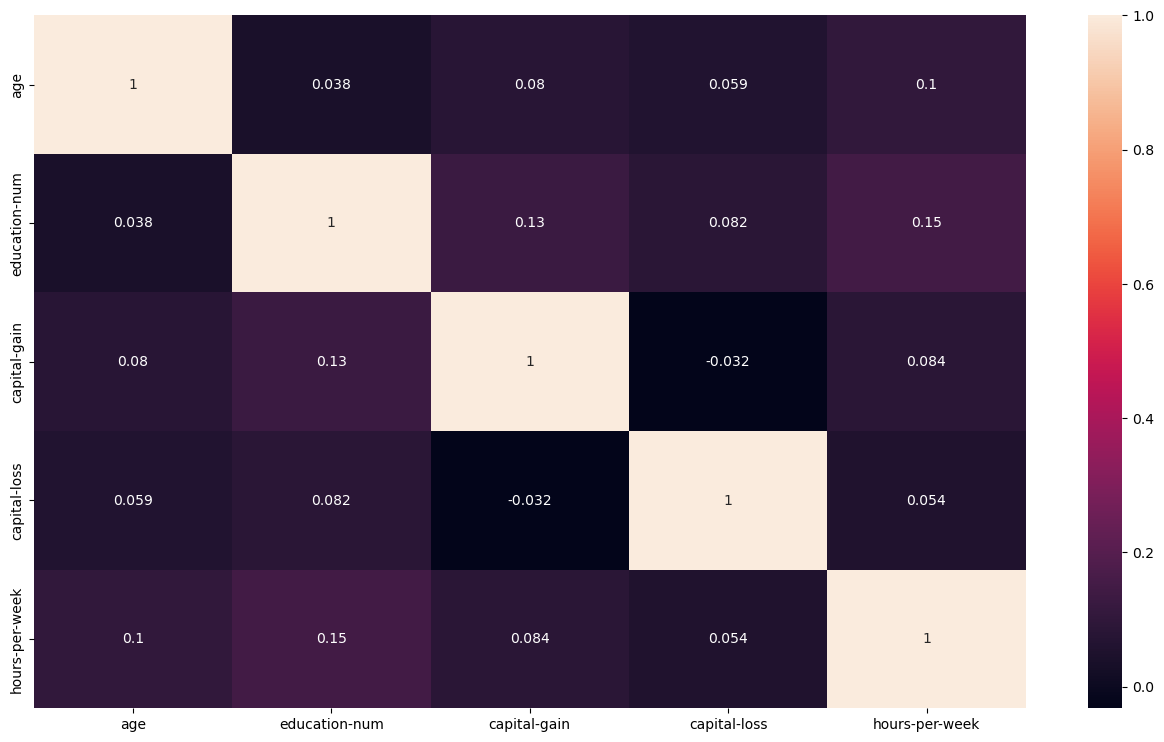

In [25]:
# pip install seaborn --upgrade
df2 = df.select_dtypes(include=['int64'])
plt.figure(figsize=(16,9))
sns.heatmap(df2.corr(method='pearson'),annot=True)

In [27]:
# Tách các cột dữ liệu thành hai phần, một phần chứa các thuộc tính bình thường, một phần chứa riêng thuộc tính quyết định

In [28]:
feature = df.drop('income',axis=1)
label = df['income']

In [33]:
# Chuyển đổi các cột không phải dạng số về dạng one-hot vector để phù hợp với đầu vào của thư viện

In [29]:
feature.select_dtypes(exclude=['int64']).columns

Index(['workclass', 'education', 'marital-status', 'occupation',
       'relationship', 'race', 'sex', 'native-country'],
      dtype='object')

In [30]:
feature_onehot = pd.get_dummies(feature,columns=feature.select_dtypes(exclude=['int64']).columns)
feature_onehot

age  education-num  capital-gain  capital-loss  hours-per-week  \
0       39             13          2174             0              40   
1       50             13             0             0              13   
2       38              9             0             0              40   
3       53              7             0             0              40   
4       28             13             0             0              40   
...    ...            ...           ...           ...             ...   
16275   33             13             0             0              40   
16276   39             13             0             0              36   
16278   38             13             0             0              50   
16279   44             13          5455             0              40   
16280   35             13             0             0              60   

       workclass_ Federal-gov  workclass_ Local-gov  workclass_ Private  \
0                       False                 False               False   
1                       False                 False               False   
2                       False                 False                True   
3                       False                 False                True   
4                       False                 False                True   
...                       ...                   ...                 ...   
16275                   False                 False                True   
16276                   False                 False                True   
16278                   False                 False                True   
16279                   False                 False                True   
16280                   False                 False               False   

       workclass_ Self-emp-inc  workclass_ Self-emp-not-inc  ...  \
0                        False                        False  ...   
1                        False                         True  ...   
2                        False                        False  ...   
3                        False                        False  ...   
4                        False                        False  ...   
...                        ...                          ...  ...   
16275                    False                        False  ...   
16276                    False                        False  ...   
16278                    False                        False  ...   
16279                    False                        False  ...   
16280                     True                        False  ...   

       native-country_ Portugal  native-country_ Puerto-Rico  \
0                         False                        False   
1                         False                        False   
2                         False                        False   
3                         False                        False   
4                         False                        False   
...                         ...                          ...   
16275                     False                        False   
16276                     False                        False   
16278                     False                        False   
16279                     False                        False   
16280                     False                        False   

       native-country_ Scotland  native-country_ South  \
0                         False                  False   
1                         False                  False   
2                         False                  False   
3                         False                  False   
4                         False                  False   
...                         ...                    ...   
16275                     False                  False   
16276                     False                  False   
16278                     False                  False   
16279                     False                  False   
16280

In [34]:
# Tách các dòng dữ liệu ra thành hai phần huấn luyện và kiểm thử như ban đầu

In [31]:
x_train = feature_onehot[:30162]
x_test = feature_onehot[30162:]
y_train=label[:30162]
y_test=label[30162:]

In [ ]:
# Xây dựng cây ID3 dựa trên dữ liệu huấn luyện và sau đó tiến hành kiểm thử kết quả của cây bằng ma trận nhầm lẫn. Biểu diễn cây vào trong kết quả thực hiện

In [35]:
clf = tree.DecisionTreeClassifier(criterion="entropy",random_state=0)
clf.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', random_state=0)

In [ ]:
# Sau khi xây dựng xong cây ID3, tiến hành áp dụng mô hình trên dữ liệu kiểm thử

In [36]:
tree_pred = clf.predict(x_test)

tree_score = metrics.accuracy_score(y_test,tree_pred)
print("Accruracy:",tree_score)
print("Report:",metrics.classification_report(y_test,tree_pred))

Accruracy: 0.8175298804780876
Report:               precision    recall  f1-score   support

       <=50K       0.88      0.88      0.88     11360
        >50K       0.63      0.62      0.62      3700

    accuracy                           0.82     15060
   macro avg       0.75      0.75      0.75     15060
weighted avg       0.82      0.82      0.82     15060



In [ ]:
# tree_cm = metrics.confusion_matrix(y_test,tree_pred)

In [37]:
tree_cm = metrics.confusion_matrix(y_test,tree_pred)

In [ ]:
# Biểu diễn lên đồ thị heatmap

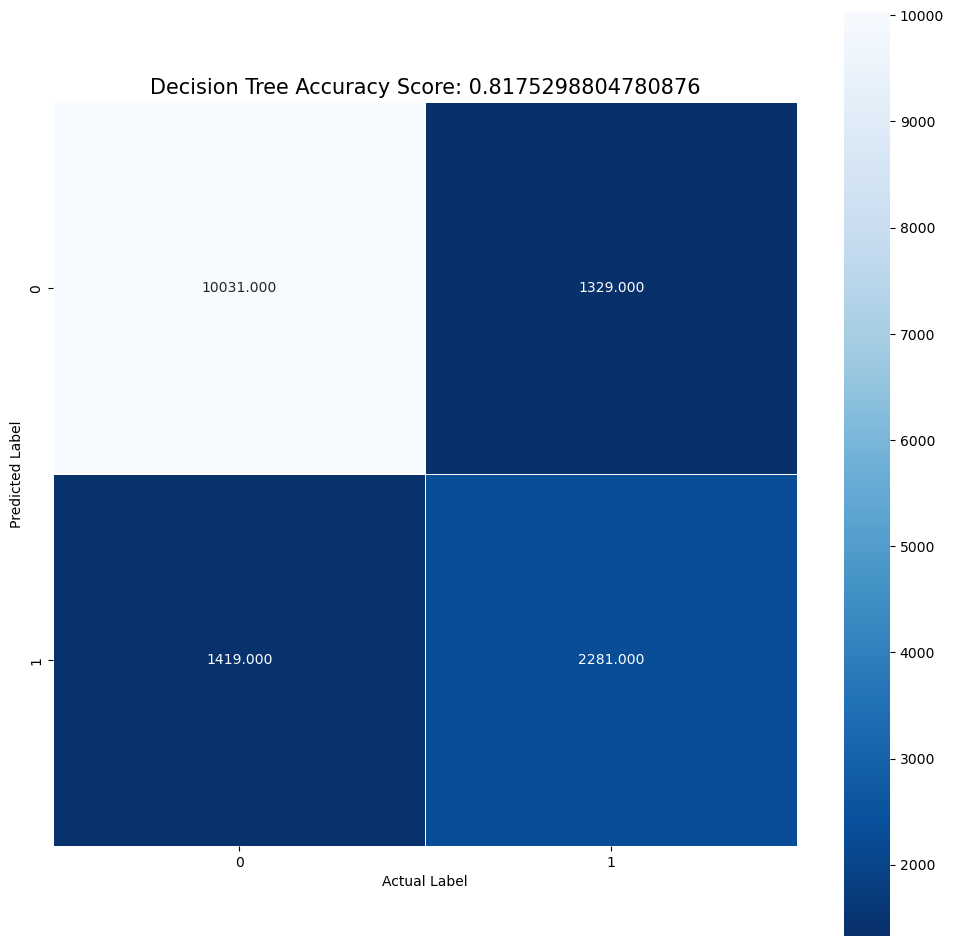

In [39]:
plt.figure(figsize=(12,12))
sns.heatmap(tree_cm,annot=True, fmt=".3f",linewidth=.5,square=True,cmap='Blues_r');
plt.xlabel('Actual Label');
plt.ylabel('Predicted Label');
title ='Decision Tree Accuracy Score: {0}'.format(tree_score)
plt.title(title,size=15);

In [40]:
# Biểu diễn cây ID3

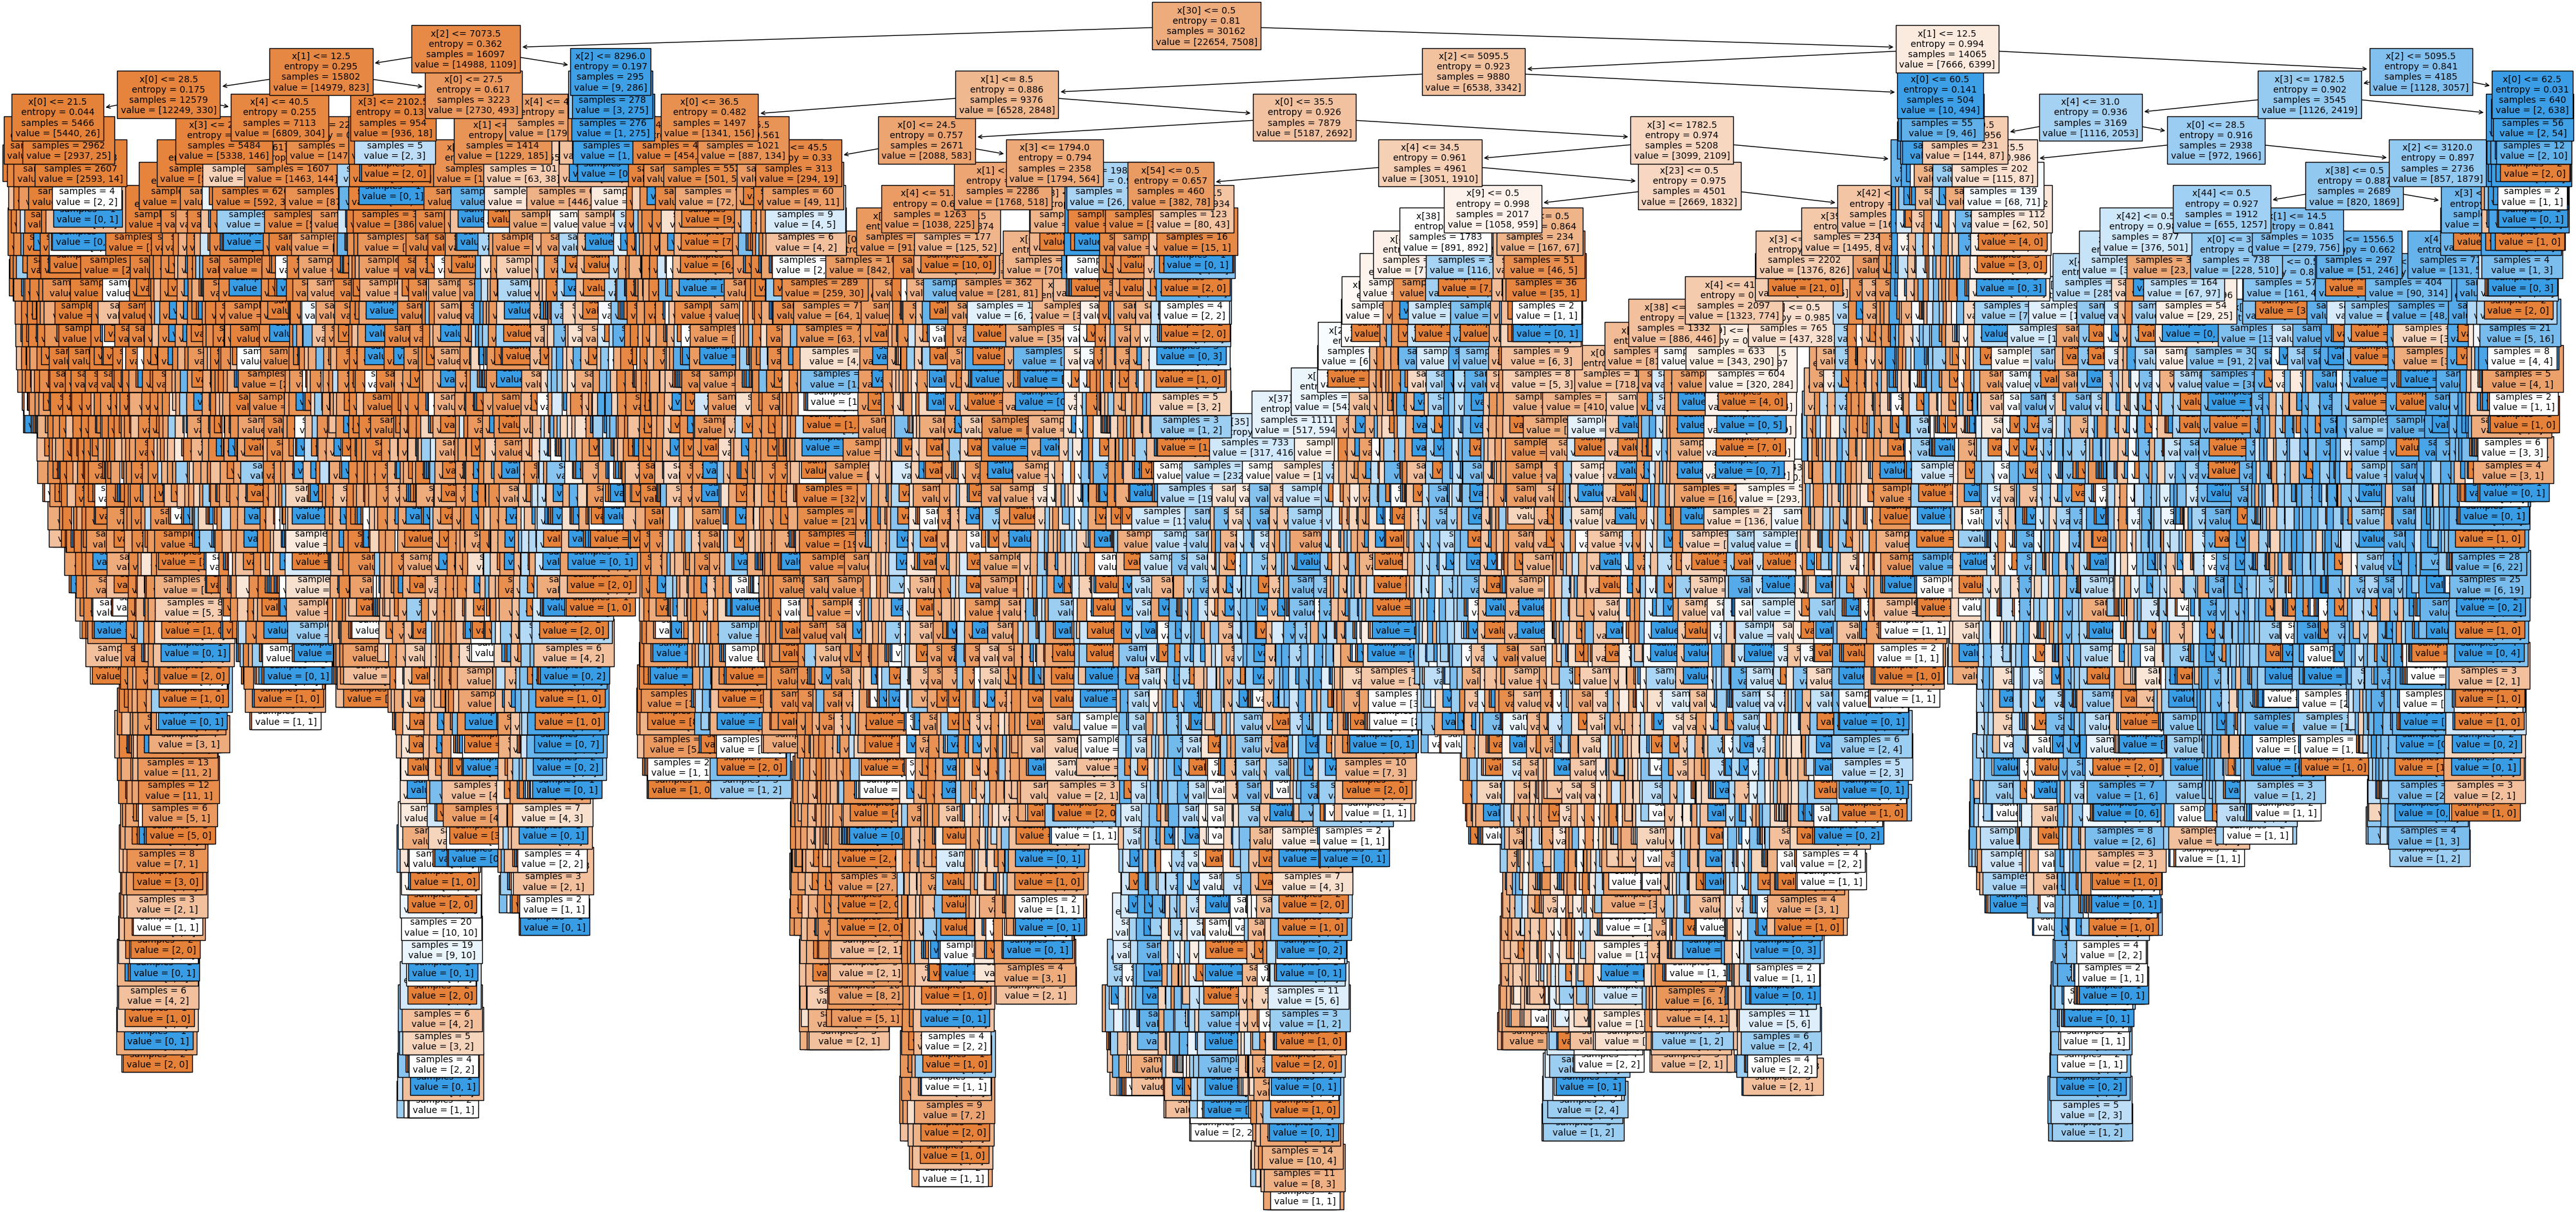

In [41]:
fig, ax = plt.subplots(figsize=(50,24))
tree.plot_tree(clf,filled=True,fontsize=10)
plt.savefig('decision_tree',dpi=100)
plt.show()

In [ ]:
#  thay thế giá trị criterion=’gini’

In [42]:
clf = tree.DecisionTreeClassifier(criterion="gini",random_state=0)
clf.fit(x_train,y_train)

DecisionTreeClassifier(random_state=0)

In [43]:
tree_pred = clf.predict(x_test)
tree_score = metrics.accuracy_score(y_test,tree_pred)
print("Accruracy:",tree_score)
print("Report:",metrics.classification_report(y_test,tree_pred))

Accruracy: 0.8122841965471448
Report:               precision    recall  f1-score   support

       <=50K       0.87      0.88      0.88     11360
        >50K       0.62      0.60      0.61      3700

    accuracy                           0.81     15060
   macro avg       0.75      0.74      0.74     15060
weighted avg       0.81      0.81      0.81     15060



In [44]:
tree_cm = metrics.confusion_matrix(y_test,tree_pred)

Text(0.5, 1.0, 'Decision Tree Accuracy Score: 0.8122841965471448')

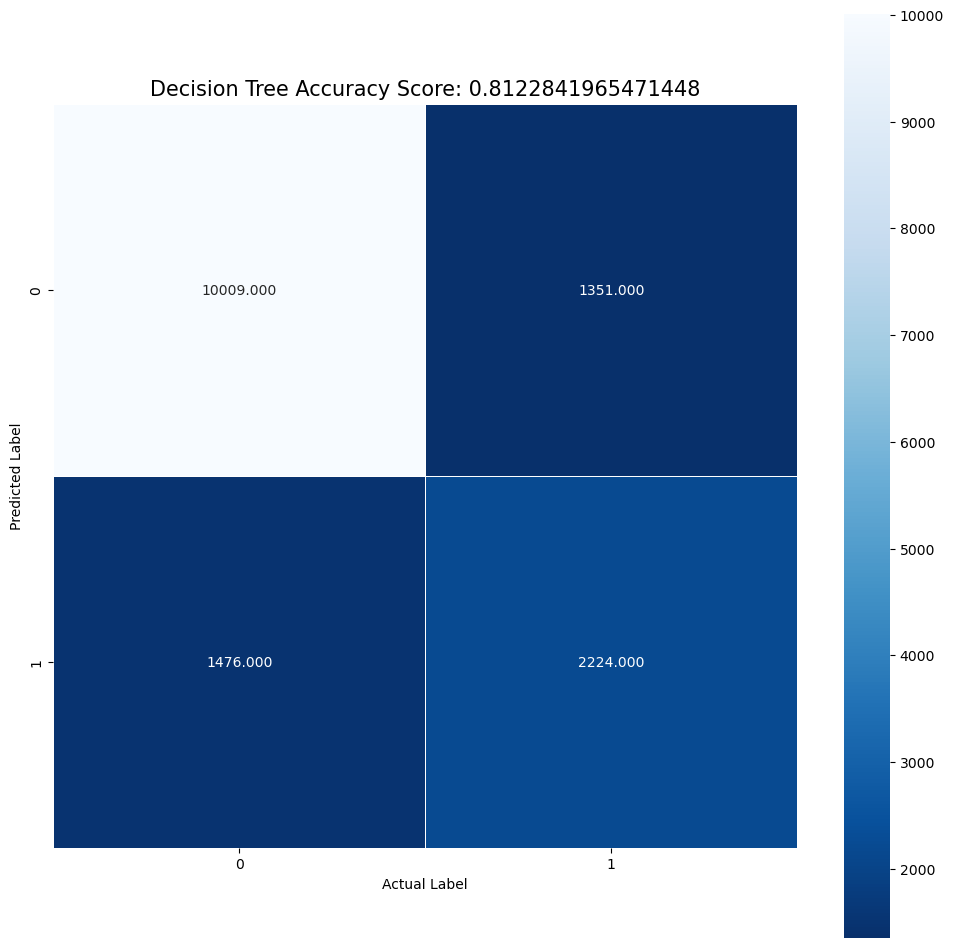

In [45]:
plt.figure(figsize=(12,12))
sns.heatmap(tree_cm,annot=True, fmt=".3f",linewidth=.5,square=True,cmap='Blues_r')
plt.xlabel('Actual Label')
plt.ylabel('Predicted Label')
title ='Decision Tree Accuracy Score: {0}'.format(tree_score)
plt.title(title,size=15)

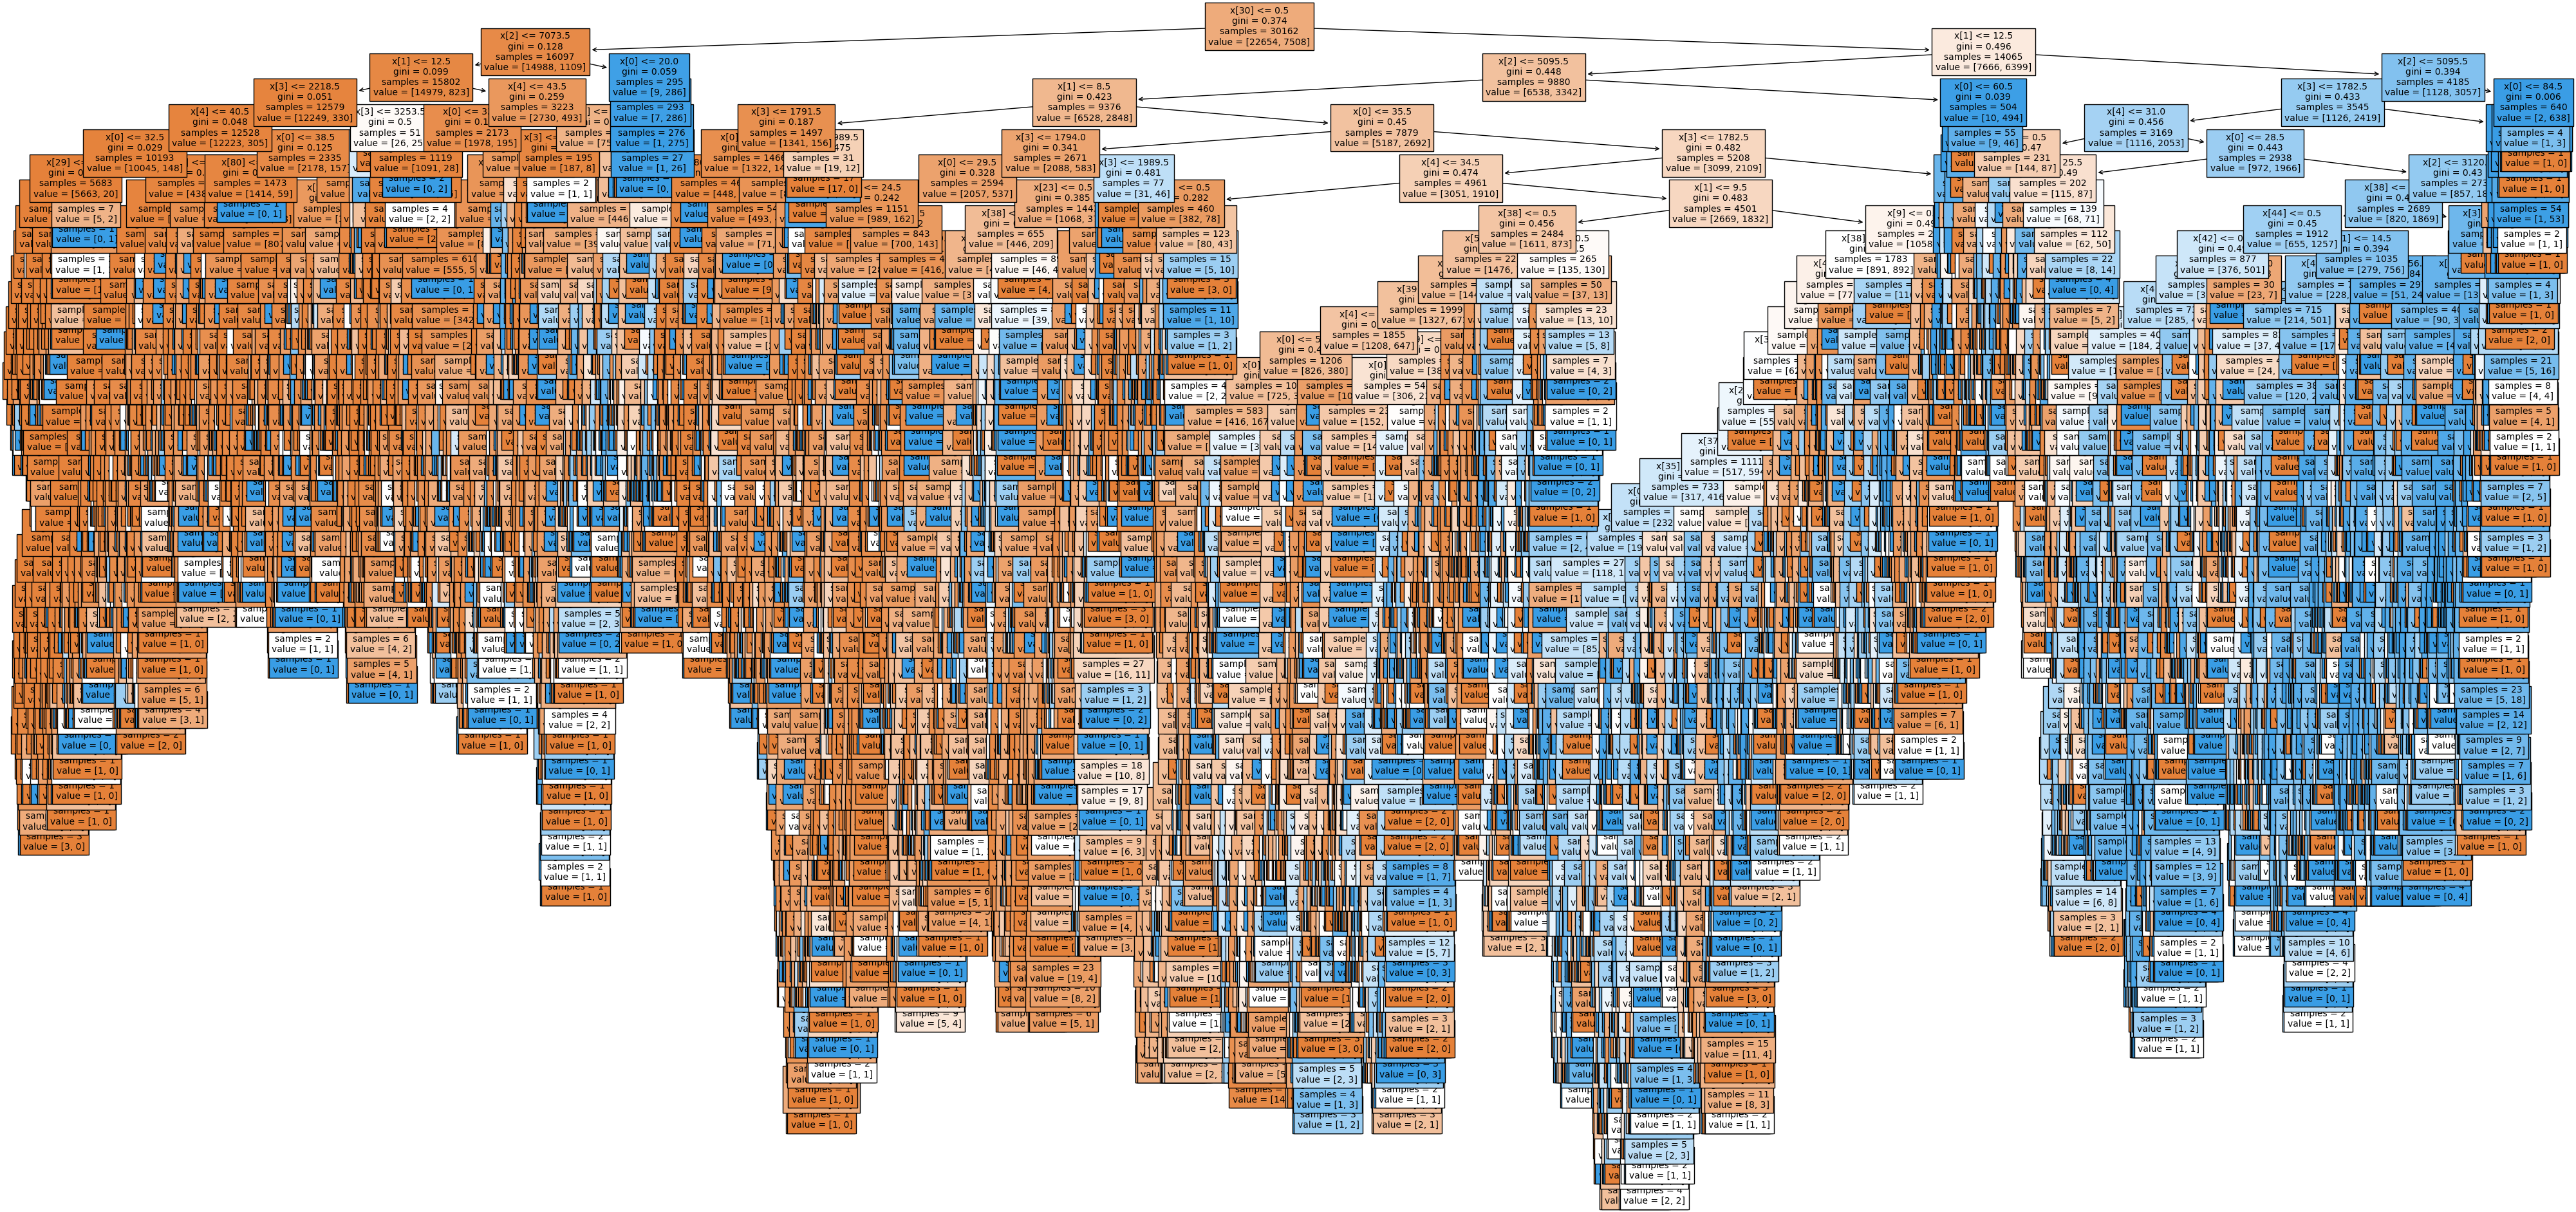

In [46]:
fig, ax = plt.subplots(figsize=(50,24))
tree.plot_tree(clf,filled=True,fontsize=10)
plt.savefig('decision_tree_gini',dpi=100)
plt.show()

In [ ]:
# Xây dựng mô hình phân lớp bằng thuật toán Naïve Bayes và kiểm tra kết quả đạt được

In [47]:
gnb = GaussianNB()

In [48]:
bayes_pred = gnb.fit(x_train, y_train).predict(x_test)

In [49]:
bayes_score = metrics.accuracy_score(y_test, bayes_pred)

In [50]:
print("Accuracy: ", bayes_score)
print("Report: ", metrics.classification_report(y_test, bayes_pred))

Accuracy:  0.8029216467463479
Report:                precision    recall  f1-score   support

       <=50K       0.93      0.80      0.86     11360
        >50K       0.57      0.82      0.67      3700

    accuracy                           0.80     15060
   macro avg       0.75      0.81      0.76     15060
weighted avg       0.84      0.80      0.81     15060



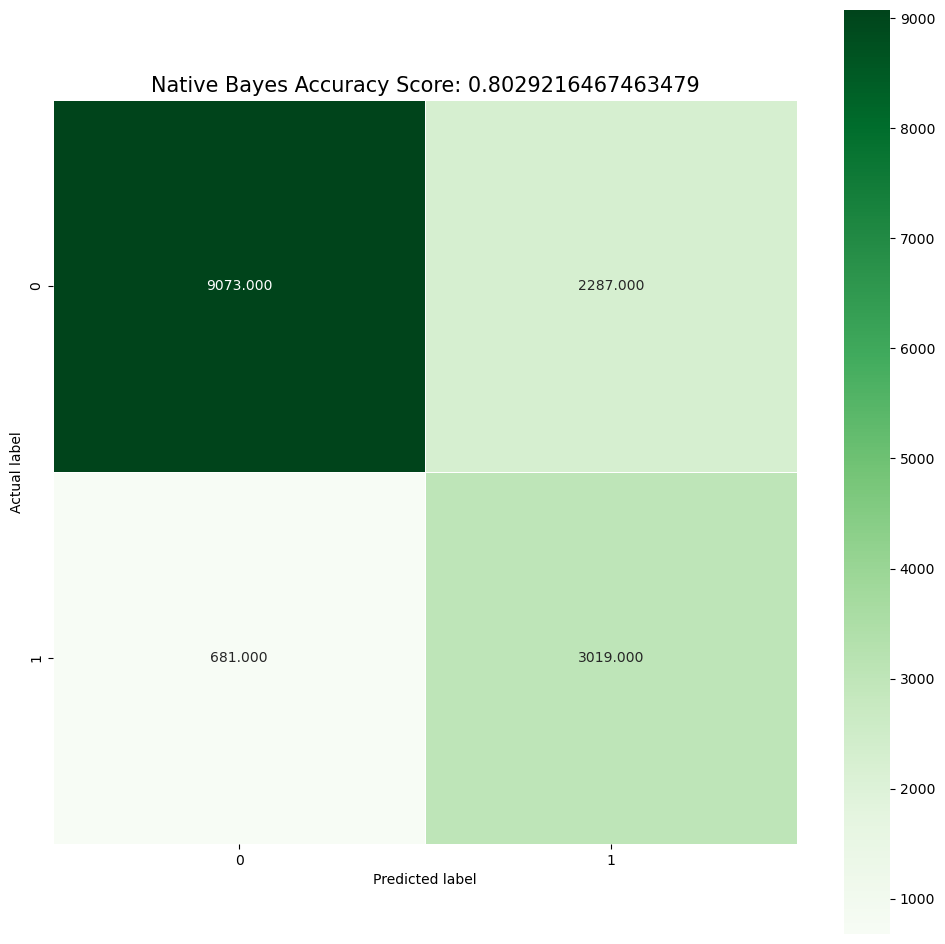

In [51]:
bayes_cm = metrics.confusion_matrix(y_test, bayes_pred)
plt.figure(figsize=(12,12))
sns.heatmap(bayes_cm,annot=True, fmt=".3f",linewidth=.5,square=True,cmap='Greens');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
title = 'Native Bayes Accuracy Score: {0}'.format(bayes_score)
plt.title(title, size=15);

In [53]:
# 10. SO SÁNH KẾT QUẢ ĐẠT ĐƯỢC CỦA CÁC MÔ HÌNH TRÊN
# Dựa vào mô hình ta có độ chính xác của các thuật toán lần lượt là:
# Thuật toán cây ID3 với 81.753%
# Thuật toán Naive Bayes với 80.292%
# Thuật toán cây CART với 81.228%
# Vậy đối với mô hình này sử dụng thuật toán cây quyết định ID3 cho ra độ chính xác cao nhất

# Còn nếu xét trên từng lớp

# Với số lớp <= 50k ID3: 0.88, CART: 0.88, Naive: 0.86 Cả ba thuật toán cho ra độ chính xác khá cao
# Với số lớp > 50k ID3: 0.62, CART: 0.61, Naive: 0.67 Cả ba thuật toán vẫn chưa cho ra được sự chính xác caoược sự chí

# Kết quả này cho thấy rằng trong trường hợp này, dù ID3 có độ chính xác cao nhất trên toàn bộ tập dữ liệu, nhưng nó vẫn không thể hiện sự ổn định và hiệu suất tốt khi xử lý các lớp dữ liệu lớn. Việc sử dụng Naive Bayes có thể là lựa chọn hợp lý hơn trong trường hợp này, với độ chính xác tương đối ổn định trên các lớp dữ liệu khác nhau. Tuy nhiên, việc chọn thuật toán phụ thuộc vào nhiều yếu tố khác nhau như cấu trúc dữ liệu, kích thước tập dữ liệu, và mục tiêu cụ thể của bài toán.nh xác cao